<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge

# Model Benchmarks & Model Tuning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

import numpy as np
import statsmodels.api as sm

from functools import partial

from yellowbrick.model_selection import FeatureImportances

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../datasets/train_clean.csv')

#increase pandas default columns/rows so I can view all at once
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250

df.sample(10)

,saleprice,age,neighborhood_order,local_conditions,was_remodeled,overall_qual,house_style_condensed_1.5,house_style_condensed_2.0,exter_qual,external_feature,bldg_type_TwnhsE,bldg_type_TwnhsI,bldg_type_2FmCon,is_hip_roof,mas_vnr_area,functional,lot_frontage,lot_area,developed_outside_sf,garage_fin*sqft,garage_cars,paved_drive,bsmt_qual,bsmt_type*sf_all,bsmt_exposure,heating_qc,kitchen_qual,fireplace_qu,quality_above_sqft,totrms_abvgrd,room_size,not_grvl_alley,land_contour_order
181,224900,5,3,2,0,7,0,1,4,10,0,0,0,0,252.0,1,65.0,8158,63,1086.0,2.0,2,4,3300.0,1,5,4,0,1768,8,221.000000,1,1
652,87000,106,1,2,1,4,0,1,3,3,0,0,0,0,0.0,0,60.0,9600,90,779.0,3.0,0,3,0.0,1,2,3,0,1774,8,221.750000,0,1
1042,117000,35,3,2,1,4,0,0,3,8,0,0,0,0,0.0,1,60.0,7200,352,728.0,2.0,2,3,1155.0,1,4,4,0,875,5,175.000000,1,1
32,270000,11,4,2,1,8,0,0,4,10,1,0,0,1,0.0,1,30.0,9549,246,1443.0,2.0,2,4,7216.0,3,5,5,4,1494,6,249.000000,1,1
1283,106000,38,1,2,0,6,0,1,3,6,0,1,0,0,127.0,1,21.0,1869,0,280.0,1.0,2,3,963.0,1,3,3,0,987,5,197.400000,1,1
35,113500,51,2,2,0,6,0,0,3,6,0,0,0,1,82.0,1,80.0,9000,92,768.0,1.0,2,4,0.0,4,2,3,4,1142,5,228.400000,1,3
615,245500,12,4,2,0,8,0,0,4,10,1,0,0,0,0.0,1,38.0,14963,374,1500.0,2.0,2,4,4716.0,1,5,5,4,1288,4,322.000000,1,1
885,128000,73,1,2,1,4,1,0,3,6,0,0,0,0,0.0,1,50.0,6000,0,240.0,1.0,2,3,2688.0,1,3,3,0,1324,6,220.666667,1,1
1169,200000,3,3,2,0,6,0,0,4,10,0,0,0,0,120.0,1,70.0,9135,215,1088.0,2.0,2,4,2040.0,3,5,4,0,1700,7,242.857143,1,1
1514,264561,0,3,2,0,8,0,0,4,10,1,0,0,1,0.0,1,53.0,3982,312,1944.0,3.0,2,4,6924.0,3,5,5,4,1567,7,223.857143,1,1


In [3]:
#Rename columns so feature importance is easier to read. This will also make the streamlit web application look more user friendly.
df.rename(columns={'saleprice': 'Sales Price', 
                          'age': 'Building Age',
                           'neighborhood_order': 'Neighboorhood Quality Index',
                           'local_conditions': 'Local Positive Features',
                           'was_remodeled': 'Remodeled Building',
                           'overall_qual': 'Overall Building Quality',
                           'house_style_condensed_1.5': 'Single Story Building',
                           'house_style_condensed_2.0': 'Multiple Story Building',
                           'exter_qual': 'External Quality',
                           'external_feature': 'Type of External Building Feature',
                           'bldg_type_TwnhsE': 'Middle-unit Townhouse',
                           'bldg_type_TwnhsI': 'End-unit Townhouse',
                           'bldg_type_2FmCon': 'Family House',
                           'is_hip_roof': 'High Roof Quality',
                           'mas_vnr_area': 'Masonry Vaneer Sqft',
                           'functional': 'Building Functionality',
                           'lot_frontage': 'Lot Frontage',
                           'lot_area': 'Lot Size',
                           'developed_outside_sf': 'Outside Grill Space',
                           'garage_fin*sqft': 'Workshop Space',
                           'garage_cars': 'Additional Car Garage',
                           'paved_drive': 'Paved Driveway',
                           'bsmt_qual': 'Basement Quality',
                           'bsmt_type*sf_all': 'Finished Basement Sqft',
                           'bsmt_exposure': 'Basement Ceiling Height',
                           'heating_qc': 'Heater Quality',
                           'kitchen_qual': 'Kitchen Quality ',
                           'fireplace_qu': 'Fireplace Quality',
                           'quality_above_sqft': 'Finished Upstairs Sqft',
                           'totrms_abvgrd': 'Rooms Upstairs',
                           'room_size': 'Size of Rooms', 
                            'not_grvl_alley': 'Paved Alley',
                            'land_contour_order': 'Hill Side Location'
                          }, inplace=True)

In [61]:
df.columns

Index(['Sales Price', 'Building Age', 'Neighboorhood Quality Index',
       'Local Positive Features', 'Remodeled Building',
       'Overall Building Quality', 'Single Story Building',
       'Multiple Story Building', 'External Quality',
       'Type of External Building Feature', 'Middle-unit Townhouse',
       'End-unit Townhouse', 'Family House', 'High Roof Quality',
       'Masonry Vaneer Sqft', 'Building Functionality', 'Lot Frontage',
       'Lot Size', 'Outside Grill Space', 'Workshop Space',
       'Additional Car Garage', 'Paved Driveway', 'Basement Quality',
       'Finished Basement Sqft', 'Basement Ceiling Height', 'Heater Quality',
       'Kitchen Quality ', 'Fireplace Quality', 'Finished Upstairs Sqft',
       'Rooms Upstairs', 'Size of Rooms', 'Paved Alley', 'Hill Side Location'],
      dtype='object')

### Data Dictionary
|Columns|Type|Dataset|Description|
|---|---|---|---|
|**Sales Price**|*int64*|train_clean|The sales price of properties| 
|**Building Age**|*int64*|train_clean|The age of house at time of sale|
|**Neighboorhood Quality Index**|*int64*|train_clean|Ranked based on interquartile percentile sale price| 
|**Local Positive Features**|*int64*|train_clean|Surrouding parks and green belt|
|**Remodeled Building**|*int64*|train_clean|Building with extensive renovation| 
|**Overall Building Quality**|*int64*|train_clean|Rates the overall material and finish of the house| 
|**Single Story Building**|*uint8*|train_clean|A single storey building|
|**Multiple Story Building**|*uint8*|train_clean|A mutliple storey building|
|**External Quality**|*int64*|train_clean|Evaluates the quality of the material on the exterior| 
|**Type of External Building Feature**|*int64*|train_clean|Building material used on exterior| 
|**Middle-unit Townhouse**|*uint8*|train_clean|Town house in the middle of the row|
|**End-unit Townhouse**|*uint8*|train_clean|Town house at the end of the row|
|**Family House**|*uint8*|train_clean|Detached house| 
|**High Roof Quality**|*int64*|train_clean|Roof material of expensive finish| 
|**Masonry Vaneer Sqft**|*float64*|train_clean|Masonry veneer area in square feet| 
|**Building Functionality**|*int64*|train_clean|Home functionality|
|**Lot Frontage**|*float64*|train_clean|Linear feet of street connected to property|
|**Lot Size**|*int64*|train_clean|Lot size in square feet|
|**Outside Grill Space**|*int64*|train_clean|Developed outdoor area|
|**Workshop Space**|*float64*|train_clean|Sheltered garage area|
|**Additional Car Garage**|*float64*|train_clean|Garage for additional car|
|**Paved Driveway**|*int64*|train_clean|Paved driveway into property|
|**Basement Quality**|*int64*|train_clean|Finishing of basement|
|**Finished Basement Sqft**|*float64*|train_clean|Area of finished basement|
|**Basement Ceiling Height**|*int64*|train_clean|Height of basement|
|**Heater Quality**|*int64*|train_clean|Heating quality and condition|
|**Kitchen Quality**|*int64*|train_clean|Kitchen quality and condition|
|**Fireplace Quality**|*int64*|train_clean|Fireplace quality and condition|
|**Finished Upstairs Sqft**|*int64*|train_clean|Finished area|
|**Rooms Upstairs**|*int64*|train_clean|No of rooms|
|**Size of Rooms**|*float64*|train_clean|Area of rooms|
|**Paved Alley**|*int64*|train_clean|Paved alley|
|**Hill Side Location**|*int64*|train_clean|Property location land contour|

In [4]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Sales Price                        2033 non-null   int64  
 1   Building Age                       2033 non-null   int64  
 2   Neighboorhood Quality Index        2033 non-null   int64  
 3   Local Positive Features            2033 non-null   int64  
 4   Remodeled Building                 2033 non-null   int64  
 5   Overall Building Quality           2033 non-null   int64  
 6   Single Story Building              2033 non-null   int64  
 7   Multiple Story Building            2033 non-null   int64  
 8   External Quality                   2033 non-null   int64  
 9   Type of External Building Feature  2033 non-null   int64  
 10  Middle-unit Townhouse              2033 non-null   int64  
 11  End-unit Townhouse                 2033 non-null   int64

((2033, 33), None)

In [5]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Sales Price,2033.0,178849.543532,73440.103247,12789.0,129500.000000,161000.000000,213000.000000,485000.000000
Building Age,2033.0,36.192327,30.035427,0.0,7.000000,34.000000,54.000000,136.000000
Neighboorhood Quality Index,2033.0,2.559764,1.000735,1.0,2.000000,3.000000,3.000000,4.000000
Local Positive Features,2033.0,1.892277,0.403850,0.0,2.000000,2.000000,2.000000,4.000000
Remodeled Building,2033.0,0.460895,0.498591,0.0,0.000000,0.000000,1.000000,1.000000
Overall Building Quality,2033.0,6.083620,1.397725,1.0,5.000000,6.000000,7.000000,10.000000
Single Story Building,2033.0,0.137727,0.344699,0.0,0.000000,0.000000,0.000000,1.000000
Multiple Story Building,2033.0,0.299065,0.457961,0.0,0.000000,0.000000,1.000000,1.000000
External Quality,2033.0,3.394491,0.574909,2.0,3.000000,3.000000,4.000000,5.000000
Type of External Building Feature,2033.0,7.749139,2.032955,2.0,6.000000,7.000000,10.000000,10.000000


## Preprocessing and Modeling

- Are categorical variables one-hot encoded? yes
- Does the student investigate or manufacture features with linear relationships to the target? yes
- Have the data been scaled appropriately? yes
- Does the student properly split and/or sample the data for validation/training purposes? yes
- Does the student utilize feature selection to remove noisy or multi-collinear features? yes
- Does the student test and evaluate a variety of models to identify a production algorithm (AT MINIMUM: linear regression, lasso, and ridge)? yes
- Does the student defend their choice of production model relevant to the data at hand and the problem?
- Does the student explain how the model works and evaluate its performance successes/downfalls?

### Using Ordinary Least Squares to examine the relationship between Sales Prices and property features


In [6]:
X = df.drop(['Sales Price'], axis=1)
X = sm.add_constant(X)
y = df['Sales Price']

ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sales Price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     557.0
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        05:35:41   Log-Likelihood:                -23331.
No. Observations:                2033   AIC:                         4.673e+04
Df Residuals:                    2000   BIC:                         4.691e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -1.654e+05   1.07e+04    -15.504      0.000   -1.86e+05   -1.44e+05
Building Age                        -47.8242     39.292     -1.217      0.224    -124.881      29.233
Neighboorhood Quality Index        5537.1068    963.020      5.750      0.000    3648.479    7425.735
Local Positive Features            7997.1064   1350.524      5.921      0.000    5348.526    1.06e+04
Remodeled Building                 4754.2354   1239.209      3.837      0.000    2323.960    7184.511
Overall Building Quality           1.028e+04    732.101     14.038      0.000    8841.840    1.17e+04
Single Story Building             -1966.0960   1840.709     -1.068      0.286   -5576.005    1643.813
Multiple Story Building           -9753.1019   1603.702     -6.082      0.000   -1.29e+04   -6608.000
External Quality                   1.213e+04   1608.608      7.538      0.000    8970.329    1.53e+04
Type of External Building Feature  1073.4362    332.921      3.224      0.001     420.527    1726.345
Middle-unit Townhouse             -1.269e+04   2383.974     -5.323      0.000   -1.74e+04   -8013.392
End-unit Townhouse                -9908.2182   3408.713     -2.907      0.004   -1.66e+04   -3223.218
Family House                      -5070.2238   3670.762     -1.381      0.167   -1.23e+04    2128.694
High Roof Quality                  5011.1032   1452.474      3.450      0.001    2162.582    7859.624
Masonry Vaneer Sqft                  24.5399      3.707      6.621      0.000      17.271      31.809
Building Functionality              1.27e+04   2247.447      5.650      0.000    8290.757    1.71e+04
Lot Frontage                        117.4682     32.549      3.609      0.000      53.634     181.302
Lot Size                              0.4490      0.096      4.700      0.000       0.262       0.636
Outside Grill Space                  15.8100      3.805      4.155      0.000       8.347      23.273
Workshop Space                        8.8815      1.486      5.977      0.000       5.967      11.796
Additional Car Garage              2294.5044   1102.700      2.081      0.038     131.943    4457.066
Paved Driveway                      441.4404   1134.197      0.389      0.697   -1782.891    2665.771
Basement Quality                   2665.2413    892.450      2.986      0.003     915.013    4415.470
Finished Basement Sqft                4.6796      0.264     17.758      0.000       4.163       5.196
Basement Ceiling Height            1797.9234    609.410      2.950      0.003     602.778    2993.069
Heater Quality                     1872.9208    693.617      2.700      0.007     512.633    3233.209
Kitchen Quality                    9918.8998   1262.364      7.857      0.000    7443.213    1.24e+04
Fireplace Quality      

### Using Linear Regression without standard scaling to examine the relationship between Sales Prices and property features

In [58]:
X = df.drop(['Sales Price'], axis=1)
y = df['Sales Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LinearRegression(fit_intercept=True).fit(X_train, y_train)

print('Training score:', lr.score(X_train, y_train))
print('Testing score:', lr.score(X_test, y_test))
print('Baseline score:', cross_val_score(lr, X, y).mean())
y_pred = lr.predict(X_test)
print('R^2 score:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

Training score: 0.8988811883518225
Testing score: 0.897201621407756
Baseline score: 0.8942005950099524
R^2 score: 0.897201621407756
RMSE: 23759.975385644513


### Included Standard Scaling and using Linear Regression, Lasso, Ridge, variations of Elastic Net

Using vizualisation to get a sense of the test fitting on the y_pred and features that have a stronger coef with Sales Price.

In [8]:
results_dict = {}

In [9]:
features = [col for col in df.columns if col != 'Sales Price']

In [10]:
def build_model(regression_fn,
               name_of_y_col,
               dataset,
               test_frac=0.3,
               show_plot_Y=False,
               show_coef_bar=False):
    X = df.drop(['Sales Price'], axis=1)
    y = df['Sales Price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac)
   
    ss = StandardScaler()
    Z_train = ss.fit_transform(X_train)
    Z_test = ss.transform(X_test)
    
    model = regression_fn(Z_train, y_train)
    
    y_pred = model.predict(Z_test)
    
    print('Training_score:', model.score(Z_train, y_train))
    print('Testing score:', model.score(Z_test, y_test))
    print('Baseline score:', cross_val_score(model, X, y).mean())
    print('R^2 score:', r2_score(y_test, y_pred))
    print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
    
    if show_plot_Y == True: 
        fig, ax = plt.subplots(figsize = (15,8))

        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)
        plt.legend();
        
    if show_coef_bar == True:
        fig, ax = plt.subplots(figsize = (15,8))
        model.coef_
        pd.Series(model.coef_, index=features).plot.bar(figsize=(15, 7));
        
    return {'training_score': model.score(Z_train, y_train),
            'testing_score': model.score(Z_test, y_test),
            'baseline_score': cross_val_score(model, X, y).mean(),
            'r^2_score': r2_score(y_test, y_pred),
            'RMSE': mean_squared_error(y_test, y_pred, squared=False)
            }

In [11]:
def compare_results():
    for key in results_dict:
        print('Regression:', key)
        print('Training score:', results_dict[key]['training_score'])
        print('Test score:', results_dict[key]['testing_score'])
        print('Baseline score:', results_dict[key]['baseline_score'])
        print('R^2 score:', results_dict[key]['r^2_score'])
        print('RMSE:', results_dict[key]['RMSE'])
        print()

In [12]:
def linear_reg(Z_train, y_train):
    model = LinearRegression()
    model.fit(Z_train, y_train)
    
    return model

Training_score: 0.9048912577937983
Testing score: 0.8814194931826493
Baseline score: 0.8942005950099524
R^2 score: 0.8814194931826493
RMSE: 26465.600011339964


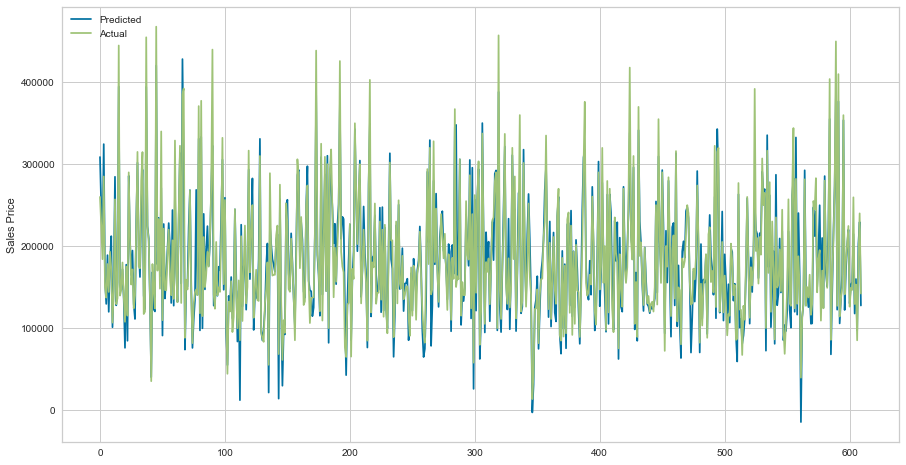

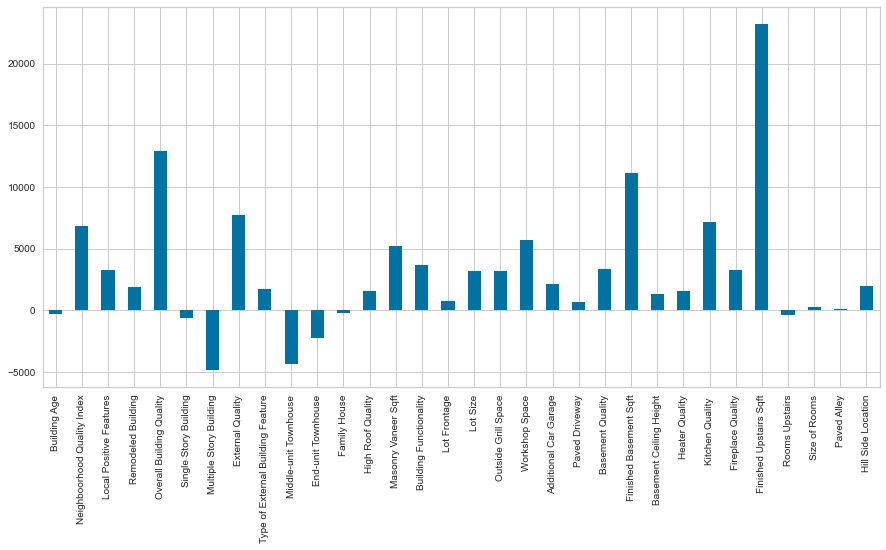

In [13]:
results_dict['saleprice ~ linear'] = build_model(linear_reg,
                                                 'Sales Price',
                                                 df,
                                                 show_plot_Y=True,
                                                 show_coef_bar=True)

In [14]:
def lasso_reg(Z_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(Z_train, y_train)
    
    return model

Training_score: 0.8984606920482043
Testing score: 0.8987818777893104
Baseline score: 0.8942008645494083
R^2 score: 0.8987818777893104
RMSE: 22950.674002349926


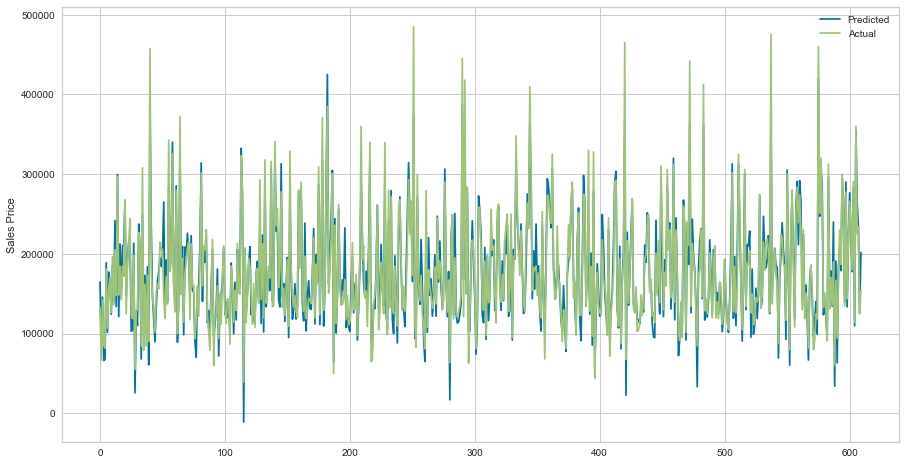

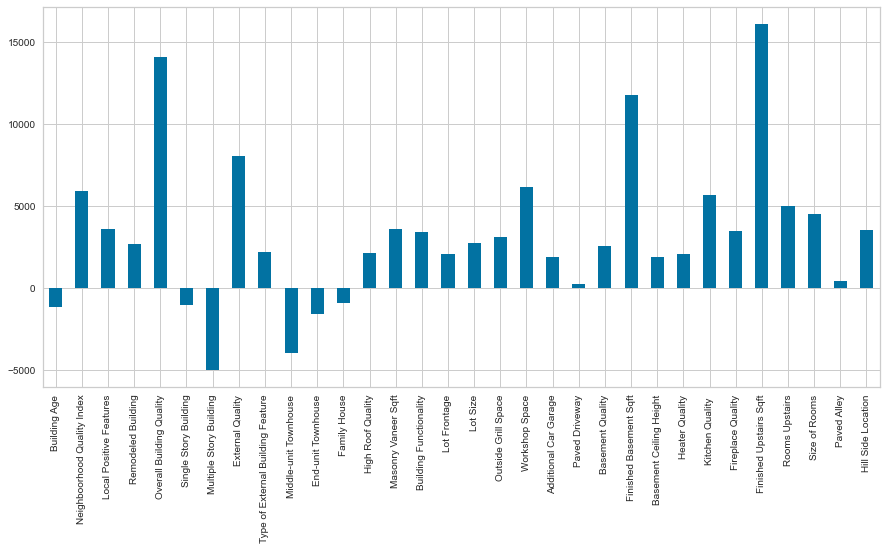

In [15]:
results_dict['saleprice ~ lasso'] = build_model(lasso_reg,
                                                 'Sales Price',
                                                 df,
                                                show_plot_Y=True,
                                                show_coef_bar=True)

In [16]:
def ridge_reg(Z_train, y_train, alpha=0.5, normalize='deprecated'):
    model = Ridge(alpha=alpha, normalize=normalize)
    model.fit(Z_train, y_train)
    
    return model

Training_score: 0.9026770065573115
Testing score: 0.8873881966024748
Baseline score: 0.8942065267095266
R^2 score: 0.8873881966024748
RMSE: 23990.157243800895


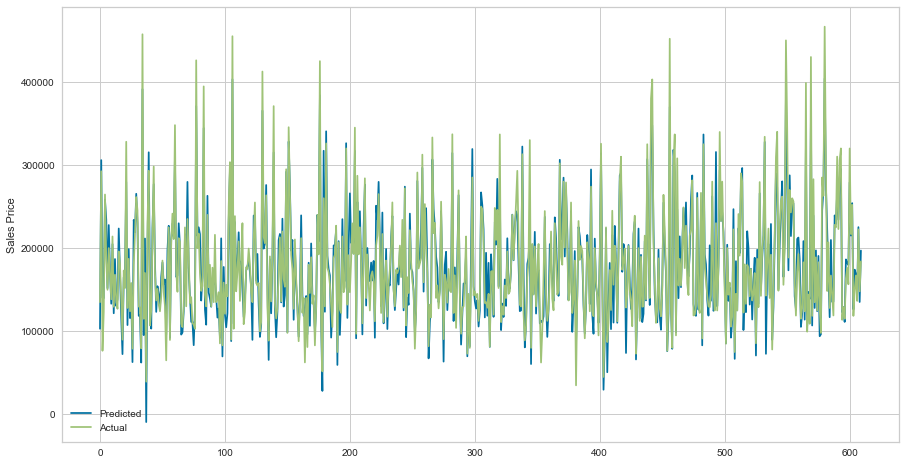

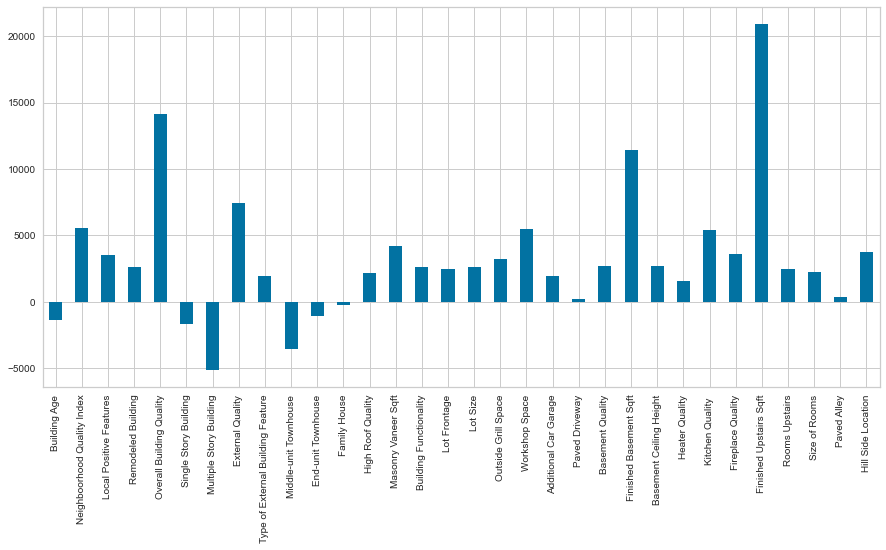

In [17]:
results_dict['saleprice ~ ridge'] = build_model(ridge_reg,
                                                 'Sales Price',
                                                 df,
                                                 show_plot_Y=True,
                                                 show_coef_bar=True)

In [18]:
def elastic_net_reg(Z_train, y_train, alpha=1, l1_ratio=0.5,
                    normalize=False, max_iter=100000, warm_start=True, equivalent_to='Elastic Net'):
    
    print('Equivalent to:', equivalent_to)
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, normalize=normalize,
                      max_iter=max_iter, warm_start=warm_start)
    model.fit(Z_train, y_train)
    
    return model

Equivalent to: OLS
Training_score: 0.8927785715878096
Testing score: 0.9087244200216519
Baseline score: 0.8942005950099384
R^2 score: 0.9087244200216519
RMSE: 22830.610199244285


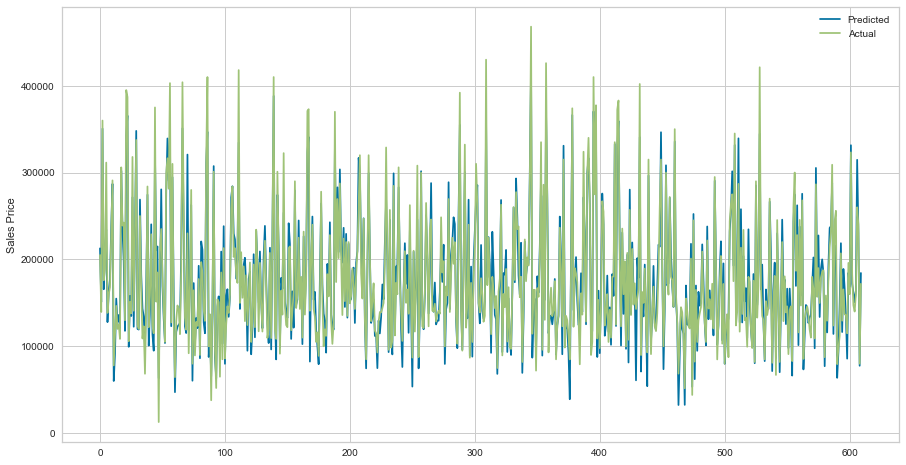

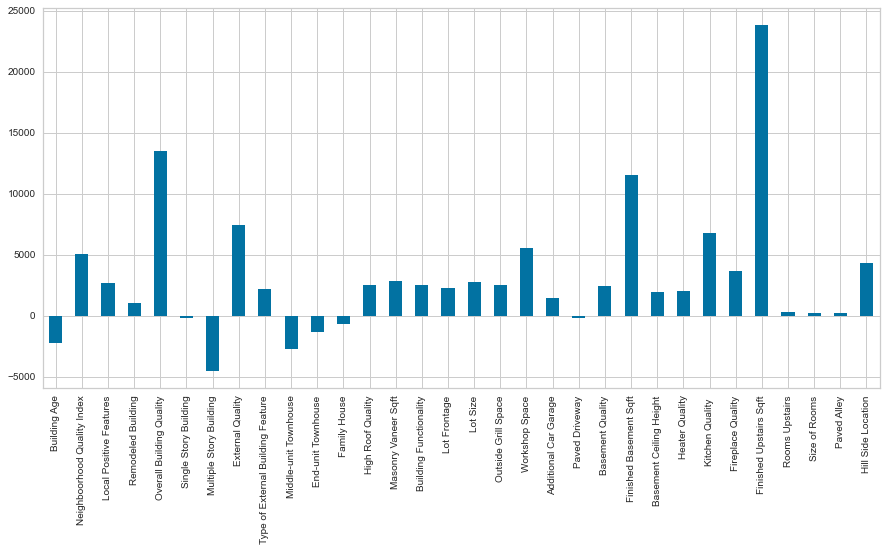

In [19]:
results_dict['saleprice ~ elastic_net_ols'] = build_model(partial(elastic_net_reg, alpha=0, equivalent_to='OLS'),
                                                 'Sales Price',
                                                 df,
                                                 show_plot_Y=True,
                                                 show_coef_bar=True)

Equivalent to: Lasso
Training_score: 0.902336602733863
Testing score: 0.8872979483887423
Baseline score: 0.8942010551089048
R^2 score: 0.8872979483887423
RMSE: 23540.342921404084


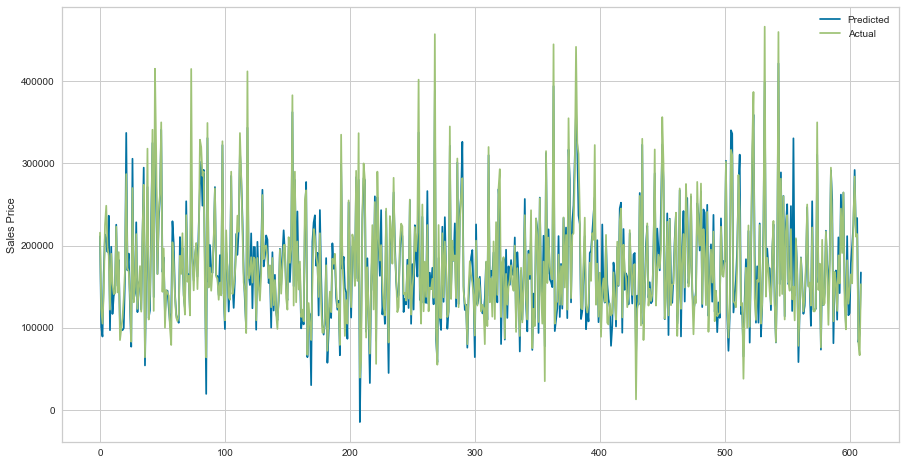

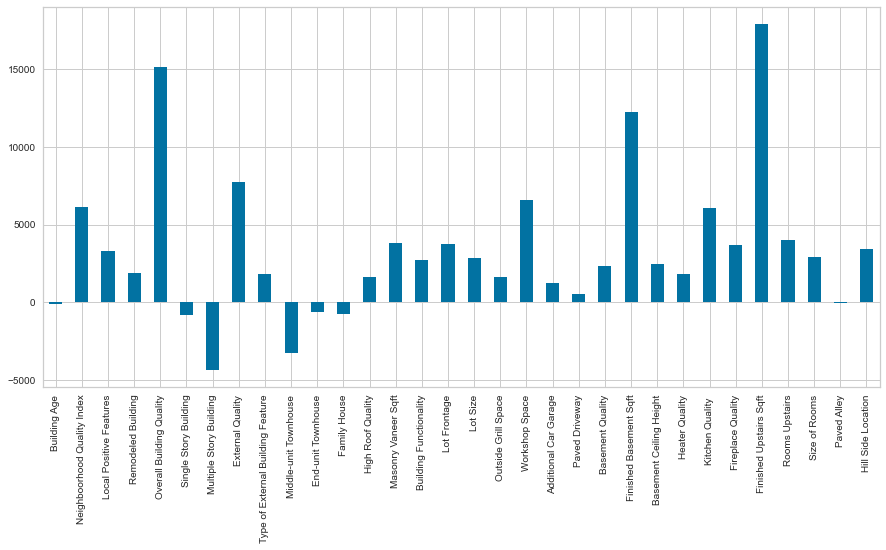

In [20]:
results_dict['saleprice ~ elastic_net_lasso'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=1, equivalent_to='Lasso'),
                                                 'Sales Price',
                                                 df,
                                                 show_plot_Y=True,
                                                 show_coef_bar=True)

Equivalent to: Ridge
Training_score: 0.8711040055263206
Testing score: 0.8824994289067253
Baseline score: 0.8704164317360767
R^2 score: 0.8824994289067253
RMSE: 25068.7469644977


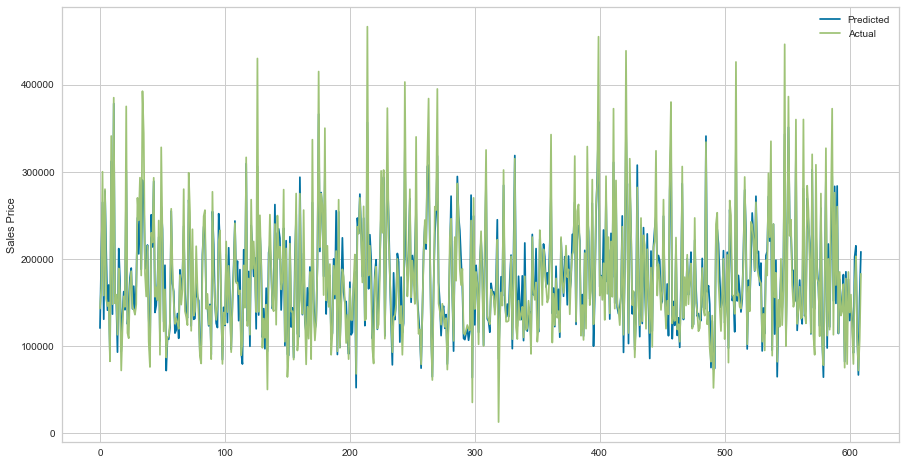

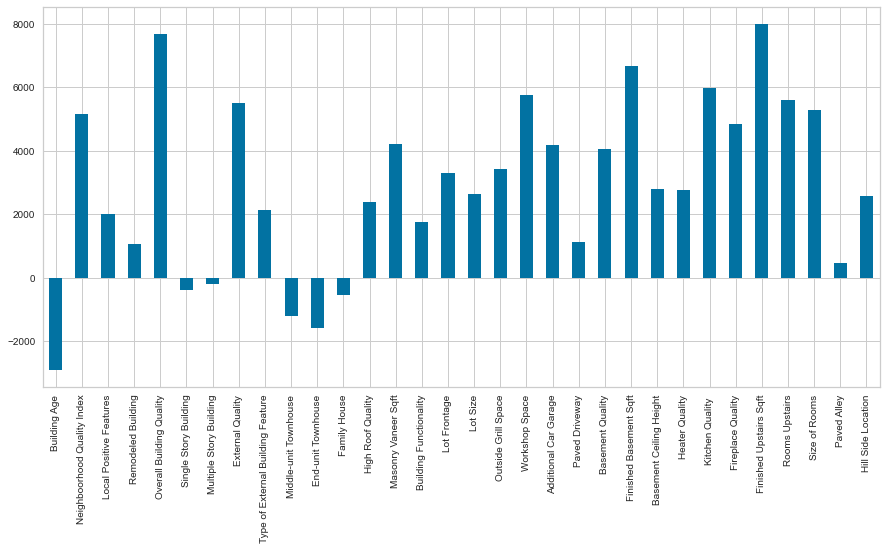

In [21]:
results_dict['saleprice ~ elastic_net_ridge'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=0, equivalent_to='Ridge'),
                                                 'Sales Price',
                                                 df,
                                                 show_plot_Y=True,
                                                 show_coef_bar=True)

In [22]:
compare_results()

Regression: saleprice ~ linear
Training score: 0.9048912577937983
Test score: 0.8814194931826493
Baseline score: 0.8942005950099524
R^2 score: 0.8814194931826493
RMSE: 26465.600011339964

Regression: saleprice ~ lasso
Training score: 0.8984606920482043
Test score: 0.8987818777893104
Baseline score: 0.8942008645494083
R^2 score: 0.8987818777893104
RMSE: 22950.674002349926

Regression: saleprice ~ ridge
Training score: 0.9026770065573115
Test score: 0.8873881966024748
Baseline score: 0.8942065267095266
R^2 score: 0.8873881966024748
RMSE: 23990.157243800895

Regression: saleprice ~ elastic_net_ols
Training score: 0.8927785715878096
Test score: 0.9087244200216519
Baseline score: 0.8942005950099384
R^2 score: 0.9087244200216519
RMSE: 22830.610199244285

Regression: saleprice ~ elastic_net_lasso
Training score: 0.902336602733863
Test score: 0.8872979483887423
Baseline score: 0.8942010551089048
R^2 score: 0.8872979483887423
RMSE: 23540.342921404084

Regression: saleprice ~ elastic_net_ridge
T

# Evaluation
From the different metrics, Elastic Net had the best scores, with the training, test, baseline and R^2 scores closely aligned and the lowest RMSE. 
Will see if changing the hyperparams further improves it.

In [52]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2)),
    ('ss', StandardScaler()), 
    ('elastic_net', ElasticNet())
])

In [24]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('ss', StandardScaler()),
                ('elastic_net', ElasticNet())])

In [25]:
pipe.score(X_test, y_test)

0.918206257252258

In [26]:
pipe.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures()),
  ('ss', StandardScaler()),
  ('elastic_net', ElasticNet())],
 'verbose': False,
 'poly': PolynomialFeatures(),
 'ss': StandardScaler(),
 'elastic_net': ElasticNet(),
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'elastic_net__alpha': 1.0,
 'elastic_net__copy_X': True,
 'elastic_net__fit_intercept': True,
 'elastic_net__l1_ratio': 0.5,
 'elastic_net__max_iter': 1000,
 'elastic_net__normalize': 'deprecated',
 'elastic_net__positive': False,
 'elastic_net__precompute': False,
 'elastic_net__random_state': None,
 'elastic_net__selection': 'cyclic',
 'elastic_net__tol': 0.0001,
 'elastic_net__warm_start': False}

In [27]:
pipe_2 = Pipeline([
    ('poly', PolynomialFeatures(degree = 2)),
    ('ss', StandardScaler()), 
    ('elastic_net', ElasticNet())
])

In [28]:
pipe_2_params = {'poly__degree': [1,2],
                 'ss__with_std': [True, False],
                 'ss__with_std': [True, False],
                 'elastic_net__alpha': [0.1, 1.0, 10.0],
                 'elastic_net__l1_ratio': [0.1,0.5,1.0],
                 'elastic_net__max_iter': [1000,10000]
                }

In [29]:
# Instantiate our GridSearchCV object.
pipe_2_gridsearch = GridSearchCV(pipe_2, 
                                 pipe_2_params, 
                                 cv=5, 
                                 verbose=1)

In [30]:
# Fit the GridSearchCV object to the data.
pipe_2_gridsearch.fit(X_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [31]:
pipe_2_gridsearch.best_params_

{'elastic_net__alpha': 0.1,
 'elastic_net__l1_ratio': 0.1,
 'elastic_net__max_iter': 1000,
 'poly__degree': 2,
 'ss__with_std': True}

In [32]:
pipe_2_gridsearch.best_score_

0.9123096635298659

In [33]:
pipe_2_gridsearch.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures()), ('ss', StandardScaler()),
                ('elastic_net', ElasticNet(alpha=0.1, l1_ratio=0.1))])

In [34]:
pipe_2_gridsearch.score(X_test, y_test)

0.9184768223223204

In [35]:
y_preds = pipe_2_gridsearch.predict(X_train)

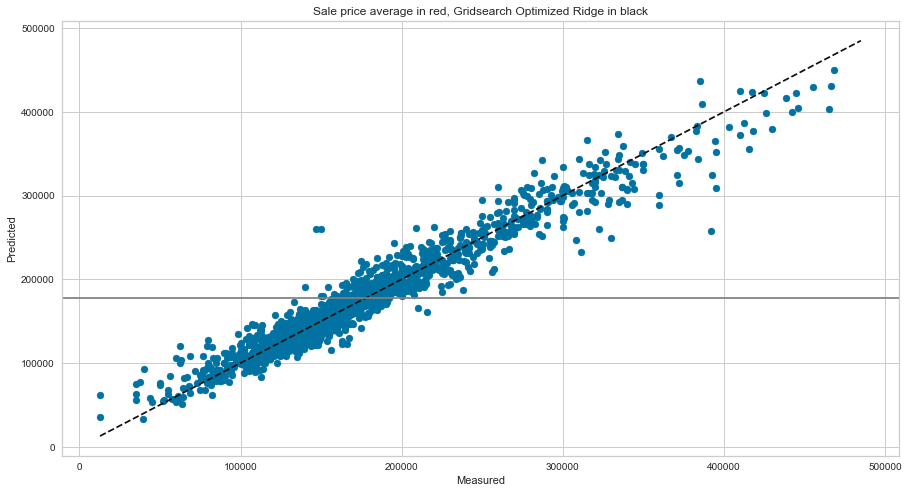

In [36]:
fig, ax = plt.subplots(figsize = (15,8))
ax.scatter(y_train, y_preds)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='grey')
plt.title("Sale price average in red, Gridsearch Optimized Ridge in black")
plt.show()

# Conclusion and Recommendations
Instatiating the final model based on pipe_2_gridsearch.best_params_
The results returned have improved.
Will explore the features that have the most bearing on Sales Price based on this model

In [47]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

X = df.drop(['Sales Price'], axis=1)
y = df['Sales Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

ss = StandardScaler(with_std=True)
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

elnet = ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=10000, normalize=False, warm_start=True).fit(Z_train, y_train)

print('Training score:', elnet.score(Z_train, y_train))
print('Testing score:', elnet.score(Z_test, y_test))
print('Baseline score:', cross_val_score(elnet, X, y).mean())
y_pred = elnet.predict(Z_test)
print('R^2 score:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

Training score: 0.8942311203735395
Testing score: 0.9046469045591974
Baseline score: 0.8916641493367219
R^2 score: 0.9046469045591974
RMSE: 22007.045039428533


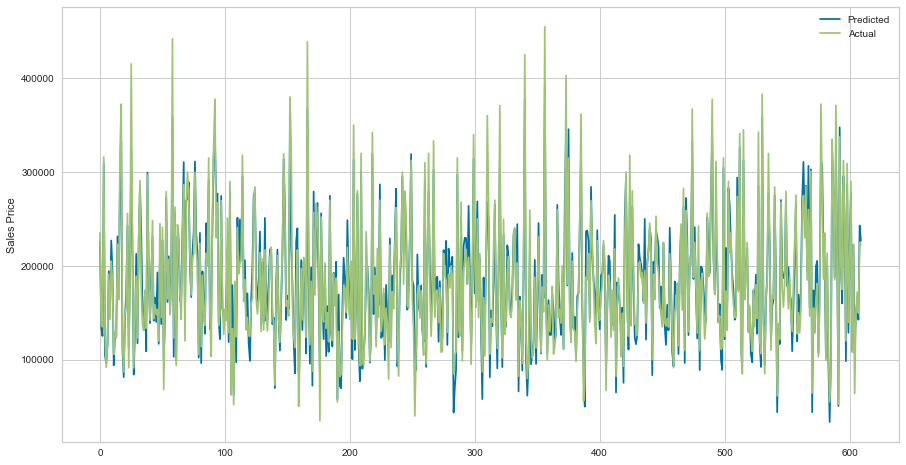

In [48]:
fig, ax = plt.subplots(figsize = (15,8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Sales Price')
plt.legend();

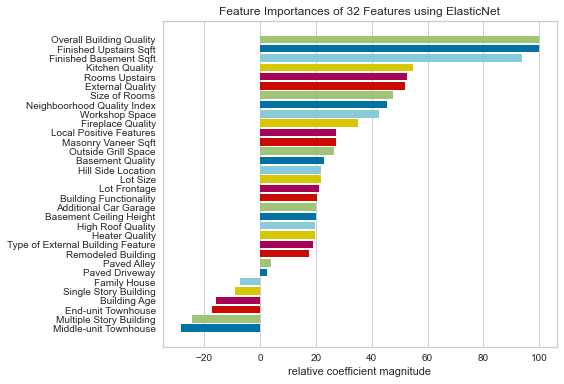

In [56]:
viz = FeatureImportances(elnet,relative=True)
#fit on train dataset
viz.fit(X_train, y_train)
#show plot and save at output path
viz.show("feature_importance.jpg");

# Conclusion

The ElasticNet model with best_params_ had the best prediction capability: 
Training score: 0.8942311203735395
Testing score: 0.9046469045591974
Baseline score: 0.8916641493367219
R^2 score: 0.9046469045591974
RMSE: 22007.045039428533

The difference between scores are about 0.01 and the RMSE is $22,007.05

1) Overall quality and finished livable, sheltered areas have the most bearing on Sales Price. Over quality and the other feature qualities have a much higher impact than expected. Perhaps, the typical buyer is willing and ready to buy a premium for what they can see, or to avoid the hassle of renovation, a good quality ready-to-move-into home is desirable. 
2) For renovation that will increase Sales Price for property flipping/selling, the kitchen is the Top Feature. Followed by fireplace, basement, roof and heater. 
3) It will be quite pointless to spend on improving the driveway or worrying about the housing height/type. Building age does not have a high positive coefficient. It has less of an impact than expected. 

## Evaluation and Conceptual Understanding

- Does the student accurately identify and explain the baseline score? - yes
- Does the student select and use metrics relevant to the problem objective? 
- Is more than one metric utilized in order to better assess performance?
- Does the student interpret the results of their model for purposes of inference?
- Is domain knowledge demonstrated when interpreting results?
- Does the student provide appropriate interpretation with regards to descriptive and inferential statistics?

# Organization and Professionalism (Check that this is done)
## Project Organization

- Are modules imported correctly (using appropriate aliases)?
- Are data imported/saved using relative paths?
- Does the README provide a good executive summary of the project?
- Is markdown formatting used appropriately to structure notebooks?
- Are there an appropriate amount of comments to support the code?
- Are files & directories organized correctly?
- Are there unnecessary files included?
- Do files and directories have well-structured, appropriate, consistent names?


## Visualizations

- Are sufficient visualizations provided?
- Do plots accurately demonstrate valid relationships?
- Are plots labeled properly?
- Are plots interpreted appropriately?
- Are plots formatted and scaled appropriately for inclusion in a notebook-based technical report?


## Python Syntax and Control Flow

- Is care taken to write human readable code?
- Is the code syntactically correct (no runtime errors)?
- Does the code generate desired results (logically correct)?
- Does the code follows general best practices and style guidelines?
- Are Pandas functions used appropriately?
- Are sklearn methods used appropriately?